# News Mood

### Analysis

* Based on the Bar graph result, CBS news has the highest positive sentiment score, and CNN has the highest negative Sentiment score
* Based on the range of sentiment values, the tweets from Fox News and New York Times are generally the most neutral tweets.
* By analysing the tweets on 03/08/2018, most of the tweets tweeted by media sources have positive sentiments.

In [97]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from itertools import cycle
import seaborn as sns

# Twitter API keys
from config import *

In [98]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [99]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [100]:
# Target News Organizations
target_media = ["BBC","CBS","CNN","FoxNews","nytimes"]

In [101]:
# Variables for holding sentiments
news_sentiment = []

In [102]:
# Loop through each News Organization
for media in target_media:
    
    # Set Tweet count
    tweet_count = 0
    
    # Grab 100 tweets from the media timeline
    public_tweets = api.user_timeline(media, count = 100, result_type = "recent")
    
    # Loop through each tweet
    for tweet in public_tweets:
        
        # Increment tweet count
        tweet_count = tweet_count + 1
    
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
             
        # Add each value to the list
        news_sentiment.append({"Tweet Account" : media,
                               "Date" : tweet["created_at"],
                               "Tweet" : tweet["text"],
                               "Tweet Ago" : tweet_count,
                               "compound_list":compound,
                               "positive_list":pos,
                               "negative_list":neg,
                               "neutral_list":neu})        
        
# Create a dataframe with the values in the list
sentiments_df = pd.DataFrame(news_sentiment)

# Display the first 5 rows of the dataframe
sentiments_df.head()

,Date,Tweet,Tweet Account,Tweet Ago,compound_list,negative_list,neutral_list,positive_list
0,Thu Mar 08 21:28:00 +0000 2018,This Ancient Egyptian pharaoh invested more in...,BBC,1,0.0000,0.000,1.000,0.000
1,Thu Mar 08 21:00:04 +0000 2018,"""No matter where in the world, when civilisati...",BBC,2,-0.2732,0.103,0.845,0.052
2,Thu Mar 08 20:33:04 +0000 2018,Jack Jarvis and Victor McDade are back for ano...,BBC,3,0.4019,0.000,0.856,0.144
3,Thu Mar 08 20:03:04 +0000 2018,Lucy and Lee are back! 🙌🎉\n\n#NotGoingOut | 9p...,BBC,4,0.0000,0.000,1.000,0.000
4,Thu Mar 08 18:00:06 +0000 2018,What advice would YOU give your younger self? ...,BBC,5,0.0000,0.000,1.000,0.000


In [103]:
# Export the data in the DataFrame into a CSV file.
sentiments_df.to_csv("Output/sentiments_data.csv", index = False)

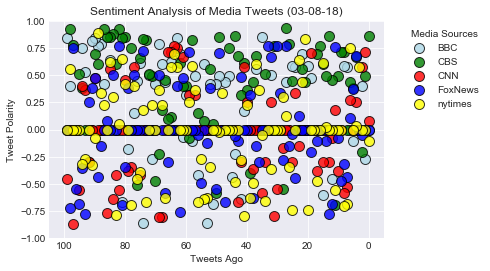

In [104]:
# Plot the 100 tweets from each media source with a timestamp "Tweets Ago". 
now = datetime.datetime.now()
sns.set_style("darkgrid")
colors = ['LightBlue','green','red', 'blue','yellow']

for i in np.arange(0,len(target_media)):
    media_source = sentiments_df.loc[sentiments_df["Tweet Account"] == target_media[i]]
    media_source = media_source.sort_values("Tweet Ago")
    plt.scatter(np.arange(len(media_source["compound_list"])), 
            media_source["compound_list"], color = colors[i],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, s =100,label= target_media[i])

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets ({})".format(now.strftime("%m-%d-%y")))

plt.xlim(105,-5)
plt.ylim(-1,1)
plt.legend(bbox_to_anchor=(1.05,1), loc="best", title="Media Sources")

# Save the figure
plt.savefig("Output/Media_Tweets.png")

plt.show()

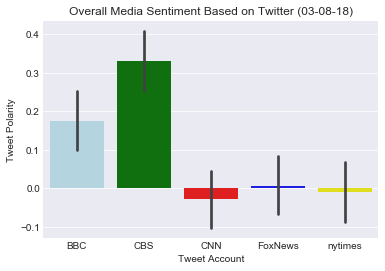

In [105]:
# Create a bar plot
now = datetime.datetime.now()

tips = sns.load_dataset("tips")
ax = sns.barplot(x="Tweet Account", y="compound_list", data = sentiments_df, palette=colors)

plt.title("Overall Media Sentiment Based on Twitter ({})".format(now.strftime("%m-%d-%y")))
plt.ylabel('Tweet Polarity')

# Save the figure
plt.savefig("Output/Media_Sentiments_Barplot.png")
plt.show()